<a href="https://colab.research.google.com/github/FrancoLauri/Arg4.0/blob/main/TrabajoClase/02_03_regresion_no_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bloque 2 - Unidad 03 - Ajuste de datos y regresión **no** lineal.

`scipy.optimize` es un submódulo de `SciPy` dedicado a la optimización y resolución de ecuaciones. Ofrece una amplia colección de algoritmos para encontrar mínimos o máximos de funciones, resolver sistemas de ecuaciones no lineales, buscar raíces de funciones y ajustar modelos a datos experimentales. Entre sus herramientas se incluyen métodos de optimización local y global, algoritmos de mínimos cuadrados, búsqueda de raíces, programación lineal y optimización con restricciones. Dentro de `optimize`, la función `curve_fit` es especialmente popular para el ajuste de curvas, ya que facilita encontrar automáticamente los parámetros de una función modelo que mejor se adaptan a un conjunto de datos, recibiendo como entrada la función a ajustar, los valores de `x` y las observaciones `y`. Internamente, `curve_fit` utiliza el motor especializado `least_squares`, que trabaja a un nivel más general tomando como entrada una función que devuelve los residuos, es decir, las diferencias entre las predicciones del modelo y los datos observados. Esta diferencia en el enfoque permite que `least_squares` sea más flexible y potente para resolver una amplia variedad de problemas de ajuste no lineal, mientras que `curve_fit` ofrece una interfaz simplificada para casos de uso comunes.

Documentación: https://docs.scipy.org/doc/scipy/reference/optimize.html




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import seaborn.objects as so

### Ajuste de una gaussiana

1. Simulá datos con el siguiente código

```python
rng = np.random.default_rng()
x = np.linspace(-5, 5, 100)
y_true = 5 * np.exp(-(x - 0)**2 / (2 * 1**2))
y = rng.normal(y_true, 0.2)
```

2. Ajustá los datos usando `scipy.optimize.curve_fit` con buenas condiciones iniciales (cercanas a los parámetros reales).

$$ y = A e^{-\frac{(x-x_0)^2}{2\sigma^2}} $$

3. Ajustá nuevamente usando malas condiciones iniciales (valores alejados de los reales).
4. ¿Cuanto vale el RMSE en cada caso?
5. Graficá los datos y las curvas ajustadas.


**Para discutir en grupo**: Para cada ajuste, registrá el número de evaluaciones de la función (`nfev`). ¿hay diferencia? ¿Por qué?

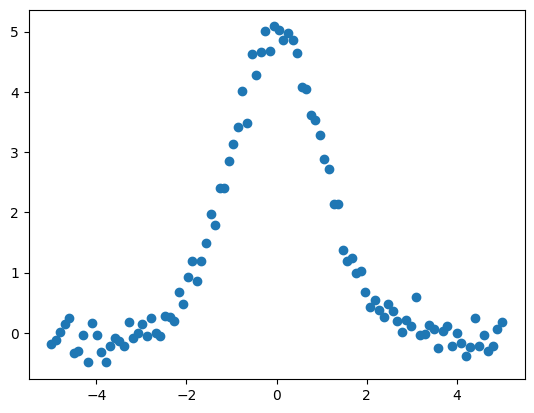

In [ ]:
rng = np.random.default_rng()
x = np.linspace(-5, 5, 100)
y_true = 5 * np.exp(-(x - 0)**2 / (2 * 1**2))
y = rng.normal(y_true, 0.2)

plt.plot(x, y, 'o')

In [ ]:
def gaussian(x, A, x0, sigma):
  return A * np.exp(-(x - x0)**2 / (2 * sigma**2))

ini_guess = [5,0,1]

curve_fit(gaussian, x, y, ini_guess)

(array([4.99883608e+00, 8.92402966e-04, 9.99999263e-01]),
 array([[ 3.41478674e-03, -1.45730498e-09, -4.55412958e-04],
        [-1.45730498e-09,  1.82207320e-04, -1.08265267e-10],
        [-4.55412958e-04, -1.08265267e-10,  1.82208420e-04]]))

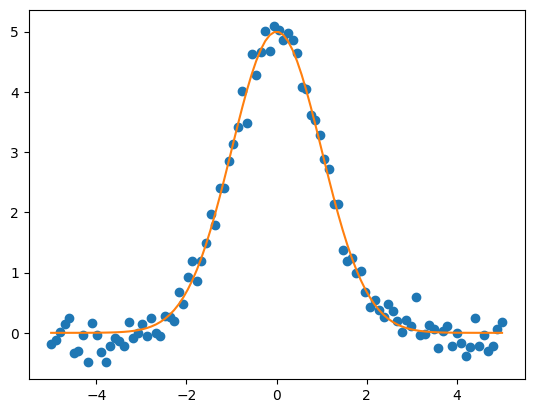

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x, gaussian(x, *ini_guess))

In [ ]:
def rmse(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred)**2))

print(rmse(ini_guess,curve_fit(gaussian, x, y, ini_guess)[0]))

0.0008467755229430102


### Ajuste de función oscilatoria

1. Simulá datos de una función

```python
rng = np.random.default_rng()
t = np.linspace(0, 4*np.pi, 100)
y_true = 3 * np.cos(2 * t + 0.5) + 1
y = rng.normal(y_true, 0.5)
```

2. Ajustá los datos usando `scipy.optimize.curve_fit` con buenas condiciones iniciales (cercanas a los parámetros reales).

$$y = a \cos(\omega t + \phi) + B$$

3. Ajustá nuevamente usando malas condiciones iniciales (valores alejados de los reales).
4. ¿Cuanto vale el RMSE en cada caso?
5. Graficá los datos y las curvas ajustadas.

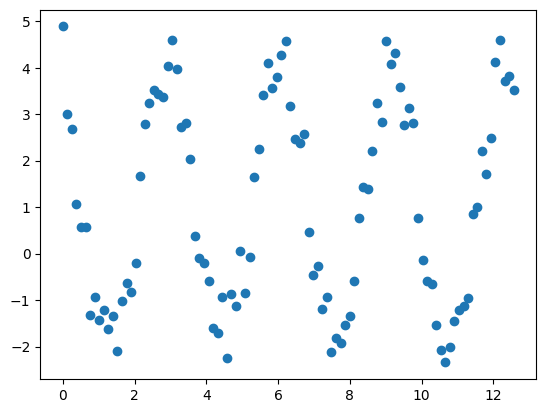

In [ ]:
rng = np.random.default_rng()
t = np.linspace(0, 4*np.pi, 100)

def oscilator(t, a, omega, phi, B):
  return a * np.cos(omega * t + phi) + B

ini_values = [3,2,0.5,1] #valores optimos
ini_values2 = [5,7,2,4]y_true = 3 * np.exp(-(x - 0)**2 / (2 * 1**2)) + 2 * np.exp(-(x - 5)**2 / (2 * 1.5**2))
y_true = oscilator(t, *ini_values)
y = rng.normal(y_true, 0.5)

plt.plot(t, y, 'o')


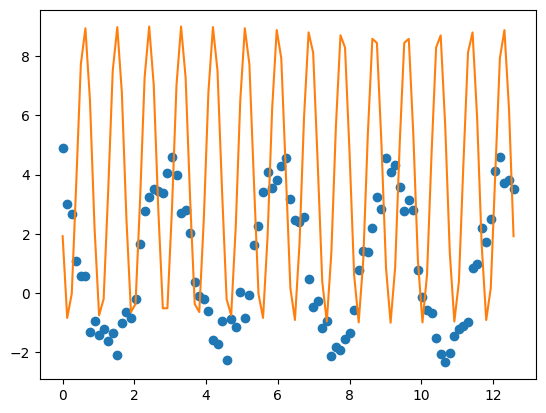

In [ ]:
curve_fit(oscilator, t, y, ini_values2)
plt.plot(t,y, 'o')
plt.plot(t, oscilator(t, *ini_values2))

In [ ]:
print(rmse(ini_values, curve_fit(oscilator, t, y, ini_values)[0]))

0.028254729332165232


###Ajuste de suma de dos gaussianas

1. Simulá datos con el siguiente código:

```python
rng = np.random.default_rng()
x = np.linspace(-5, 10, 200)
y_true = 3 * np.exp(-(x - 0)**2 / (2 * 1**2)) + 2 * np.exp(-(x - 5)**2 / (2 * 1.5**2))
y = rng.normal(y_true, 0.2)
```
2. Ajustá los datos usando `scipy.optimize.curve_fit` con buenas condiciones iniciales.

$$ y = A_1 e^{-\frac{(x-x_1)^2}{2\sigma_1^2}} + A_2 e^{-\frac{(x-x_2)^2}{2\sigma_2^2}} $$

3. Repetí con malas condiciones iniciales.
4. Registrá `nfev` y `njev` en cada caso.
5. Graficá los resultados.

In [ ]:
rng = np.random.default_rng()
x = np.linspace(-5, 10, 200)

def gaussian_sum(x, A1, x1, sigma1, A2, x2, sigma2):
  return A1 * np.exp(-(x - x1)**2 / (2 * sigma1**2)) + A2 * np.exp(-(x - x2)**2 / (2 * sigma2**2))

ini_values3 = [3,0,1,2,5,1]
ini_values4 = [4,0.2,3,2,4,2]

y_true = gaussian_sum(x, *ini_values3)
y = rng.normal(y_true, 0.2)

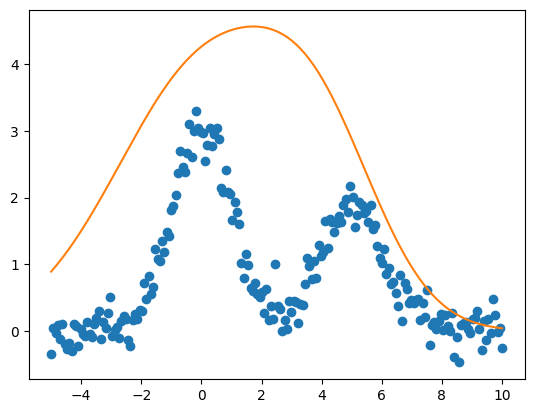

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x, gaussian_sum(x, *ini_values4))

In [ ]:
popt, pcov, infodict, _, _ = curve_fit(gaussian_sum, x, y, p0=ini_values3, full_output=True)
nfev_good = infodict['nfev']  # Obtener nfev


**Bonus**: En cada caso ¿Hay algún parámetro que afecte mas en el caso de elegir mas la condición inicial? Hace un gráfico del paisaje de SSE en función de los parámetros para contraponer a la respuesta que acabas de dar.

**Bonus Extra**:
- ¿Cómo cambia el codigo si usas la función `scipy.optimize.least_squares`?
- ¿Cómo cambia el codigo si usas la función `scipy.optimize.minimize`?